In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import Kan_NN
import importlib
importlib.reload(Kan_NN)

<module 'Kan_NN' from 'c:\\Users\\JP\\Documents\\TU Berlin\\Master\\Code_clean\\Kan_NN.py'>

In [14]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman3
def get_loader(noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Generate the Friedman dataset
    X_train, y_train = make_friedman3(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman3(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 1024
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader, scaler_X

In [16]:
import pickle
_,_, scaler_X = get_loader(1,20000)
with open('fried_3_scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

4 0 [[16], [64]]
Epoch [1/1000], Loss: 0.701516, test: 0.123242, lr: 0.001000
Epoch [2/1000], Loss: 0.140617, test: 0.088523, lr: 0.001000
Epoch [3/1000], Loss: 0.087413, test: 0.077185, lr: 0.001000
Epoch [4/1000], Loss: 0.065079, test: 0.054506, lr: 0.001000
Epoch [5/1000], Loss: 0.043332, test: 0.033529, lr: 0.001000
Epoch [6/1000], Loss: 0.025157, test: 0.017518, lr: 0.001000
Epoch [7/1000], Loss: 0.013993, test: 0.011768, lr: 0.001000
Epoch [8/1000], Loss: 0.010068, test: 0.009166, lr: 0.001000
Epoch [9/1000], Loss: 0.007880, test: 0.007457, lr: 0.001000
Epoch [10/1000], Loss: 0.006334, test: 0.006149, lr: 0.001000
Epoch [11/1000], Loss: 0.005227, test: 0.005023, lr: 0.001000
Epoch [12/1000], Loss: 0.004351, test: 0.004363, lr: 0.001000
Epoch [13/1000], Loss: 0.003592, test: 0.003569, lr: 0.001000
Epoch [14/1000], Loss: 0.003030, test: 0.003209, lr: 0.001000
Epoch [15/1000], Loss: 0.002623, test: 0.002721, lr: 0.001000
Epoch [16/1000], Loss: 0.002252, test: 0.002464, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.000016, test: 0.000072, lr: 0.001000


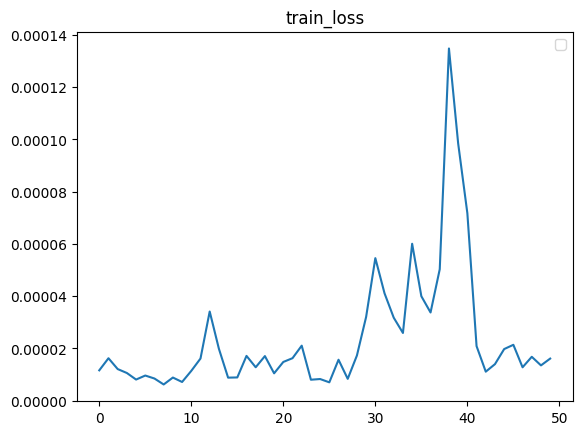

Training Complete!
4 0.2 [[16], [64]]
Epoch [1/1000], Loss: 0.743157, test: 0.123605, lr: 0.001000
Epoch [2/1000], Loss: 0.181388, test: 0.088453, lr: 0.001000
Epoch [3/1000], Loss: 0.127111, test: 0.077117, lr: 0.001000
Epoch [4/1000], Loss: 0.104804, test: 0.054723, lr: 0.001000
Epoch [5/1000], Loss: 0.082784, test: 0.033663, lr: 0.001000
Epoch [6/1000], Loss: 0.065139, test: 0.017653, lr: 0.001000
Epoch [7/1000], Loss: 0.054382, test: 0.011919, lr: 0.001000
Epoch [8/1000], Loss: 0.050711, test: 0.009468, lr: 0.001000
Epoch [9/1000], Loss: 0.048642, test: 0.007798, lr: 0.001000
Epoch [10/1000], Loss: 0.047103, test: 0.006612, lr: 0.001000
Epoch [11/1000], Loss: 0.046178, test: 0.005624, lr: 0.001000
Epoch [12/1000], Loss: 0.045255, test: 0.004804, lr: 0.001000
Epoch [13/1000], Loss: 0.044575, test: 0.004130, lr: 0.001000
Epoch [14/1000], Loss: 0.043996, test: 0.003654, lr: 0.001000
Epoch [15/1000], Loss: 0.043596, test: 0.003289, lr: 0.001000
Epoch [16/1000], Loss: 0.043290, test: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.038902, test: 0.002135, lr: 0.001000


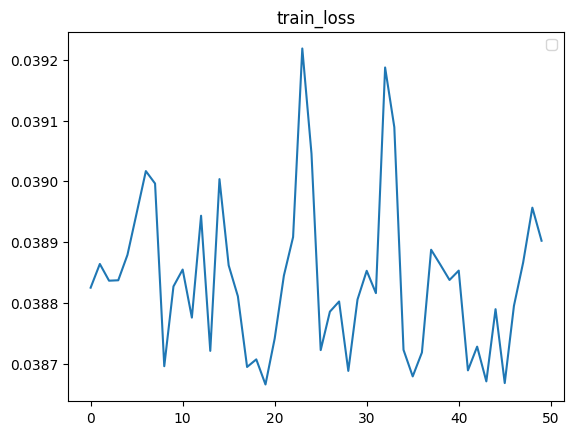

Training Complete!
4 0.5 [[16], [64]]
Epoch [1/1000], Loss: 0.957752, test: 0.124167, lr: 0.001000
Epoch [2/1000], Loss: 0.394984, test: 0.088449, lr: 0.001000
Epoch [3/1000], Loss: 0.339115, test: 0.077138, lr: 0.001000
Epoch [4/1000], Loss: 0.316604, test: 0.055418, lr: 0.001000
Epoch [5/1000], Loss: 0.294241, test: 0.034743, lr: 0.001000
Epoch [6/1000], Loss: 0.278101, test: 0.019108, lr: 0.001000
Epoch [7/1000], Loss: 0.267636, test: 0.012844, lr: 0.001000
Epoch [8/1000], Loss: 0.264645, test: 0.009979, lr: 0.001000
Epoch [9/1000], Loss: 0.261950, test: 0.008601, lr: 0.001000
Epoch [10/1000], Loss: 0.260141, test: 0.007431, lr: 0.001000
Epoch [11/1000], Loss: 0.259779, test: 0.006544, lr: 0.001000
Epoch [12/1000], Loss: 0.258389, test: 0.005751, lr: 0.001000
Epoch [13/1000], Loss: 0.258045, test: 0.005233, lr: 0.001000
Epoch [14/1000], Loss: 0.257500, test: 0.004606, lr: 0.001000
Epoch [15/1000], Loss: 0.257186, test: 0.004255, lr: 0.001000
Epoch [16/1000], Loss: 0.256939, test: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.239322, test: 0.011735, lr: 0.001000


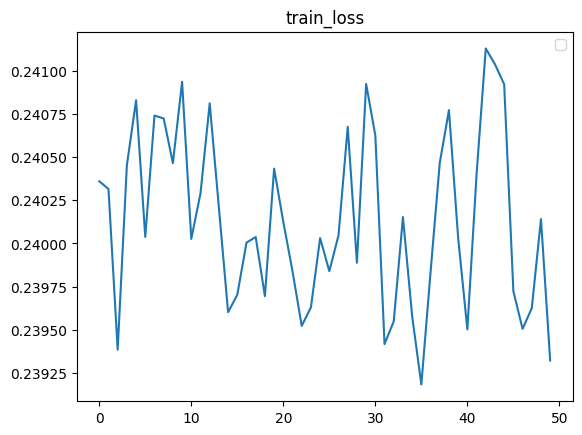

Training Complete!
4 1.0 [[16], [64]]
Epoch [1/1000], Loss: 1.721127, test: 0.124979, lr: 0.001000
Epoch [2/1000], Loss: 1.157501, test: 0.088503, lr: 0.001000
Epoch [3/1000], Loss: 1.098793, test: 0.077221, lr: 0.001000
Epoch [4/1000], Loss: 1.075151, test: 0.057083, lr: 0.001000
Epoch [5/1000], Loss: 1.052020, test: 0.037169, lr: 0.001000
Epoch [6/1000], Loss: 1.039118, test: 0.024361, lr: 0.001000
Epoch [7/1000], Loss: 1.030025, test: 0.014812, lr: 0.001000
Epoch [8/1000], Loss: 1.027286, test: 0.011407, lr: 0.001000
Epoch [9/1000], Loss: 1.022309, test: 0.009851, lr: 0.001000
Epoch [10/1000], Loss: 1.019723, test: 0.008806, lr: 0.001000
Epoch [11/1000], Loss: 1.021175, test: 0.008004, lr: 0.001000
Epoch [12/1000], Loss: 1.018326, test: 0.007544, lr: 0.001000
Epoch [13/1000], Loss: 1.019233, test: 0.007914, lr: 0.001000
Epoch [14/1000], Loss: 1.019041, test: 0.006436, lr: 0.001000
Epoch [15/1000], Loss: 1.019396, test: 0.006819, lr: 0.001000
Epoch [16/1000], Loss: 1.018897, test: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.955724, test: 0.047037, lr: 0.001000


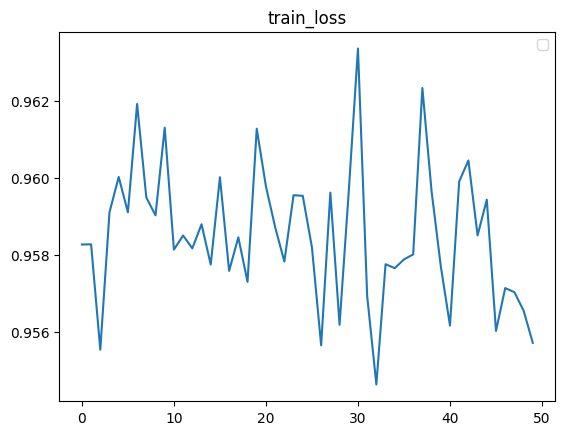

Training Complete!
4 0 [[128], [16]]
Epoch [1/1000], Loss: 0.929107, test: 0.206630, lr: 0.001000
Epoch [2/1000], Loss: 0.138068, test: 0.140699, lr: 0.001000
Epoch [3/1000], Loss: 0.101735, test: 0.096904, lr: 0.001000
Epoch [4/1000], Loss: 0.087925, test: 0.082882, lr: 0.001000
Epoch [5/1000], Loss: 0.074362, test: 0.066644, lr: 0.001000
Epoch [6/1000], Loss: 0.055269, test: 0.046076, lr: 0.001000
Epoch [7/1000], Loss: 0.038033, test: 0.031774, lr: 0.001000
Epoch [8/1000], Loss: 0.024467, test: 0.018042, lr: 0.001000
Epoch [9/1000], Loss: 0.014403, test: 0.011882, lr: 0.001000
Epoch [10/1000], Loss: 0.010327, test: 0.009497, lr: 0.001000
Epoch [11/1000], Loss: 0.008411, test: 0.007918, lr: 0.001000
Epoch [12/1000], Loss: 0.006919, test: 0.006608, lr: 0.001000
Epoch [13/1000], Loss: 0.005680, test: 0.005476, lr: 0.001000
Epoch [14/1000], Loss: 0.004650, test: 0.004595, lr: 0.001000
Epoch [15/1000], Loss: 0.003880, test: 0.003945, lr: 0.001000
Epoch [16/1000], Loss: 0.003366, test: 0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.000095, test: 0.000133, lr: 0.001000


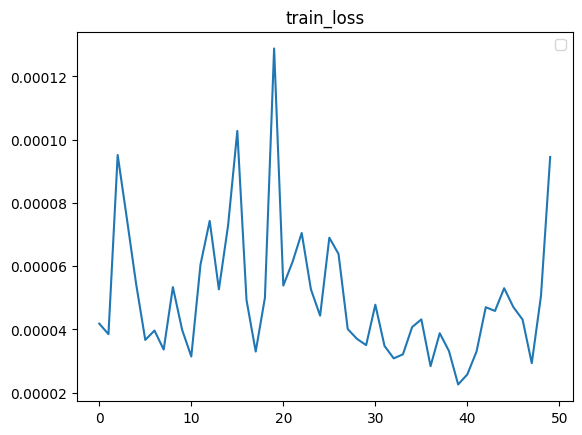

Training Complete!
4 0.2 [[128], [16]]
Epoch [1/1000], Loss: 0.972432, test: 0.206701, lr: 0.001000
Epoch [2/1000], Loss: 0.177787, test: 0.141655, lr: 0.001000
Epoch [3/1000], Loss: 0.141882, test: 0.096511, lr: 0.001000
Epoch [4/1000], Loss: 0.127769, test: 0.083131, lr: 0.001000
Epoch [5/1000], Loss: 0.114274, test: 0.067311, lr: 0.001000
Epoch [6/1000], Loss: 0.096030, test: 0.047259, lr: 0.001000
Epoch [7/1000], Loss: 0.078926, test: 0.032764, lr: 0.001000
Epoch [8/1000], Loss: 0.065431, test: 0.019318, lr: 0.001000
Epoch [9/1000], Loss: 0.055615, test: 0.012764, lr: 0.001000
Epoch [10/1000], Loss: 0.051314, test: 0.010350, lr: 0.001000
Epoch [11/1000], Loss: 0.049571, test: 0.008830, lr: 0.001000
Epoch [12/1000], Loss: 0.047896, test: 0.007233, lr: 0.001000
Epoch [13/1000], Loss: 0.046718, test: 0.006141, lr: 0.001000
Epoch [14/1000], Loss: 0.045556, test: 0.005250, lr: 0.001000
Epoch [15/1000], Loss: 0.044990, test: 0.004738, lr: 0.001000
Epoch [16/1000], Loss: 0.044508, test: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.036867, test: 0.002771, lr: 0.001000


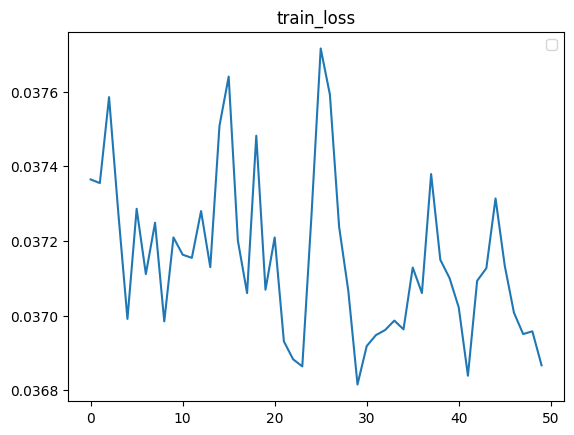

Training Complete!
4 0.5 [[128], [16]]
Epoch [1/1000], Loss: 1.189440, test: 0.206844, lr: 0.001000
Epoch [2/1000], Loss: 0.389495, test: 0.142994, lr: 0.001000
Epoch [3/1000], Loss: 0.354352, test: 0.095975, lr: 0.001000
Epoch [4/1000], Loss: 0.339770, test: 0.083508, lr: 0.001000
Epoch [5/1000], Loss: 0.326140, test: 0.067878, lr: 0.001000
Epoch [6/1000], Loss: 0.308254, test: 0.048213, lr: 0.001000
Epoch [7/1000], Loss: 0.292146, test: 0.034538, lr: 0.001000
Epoch [8/1000], Loss: 0.279211, test: 0.021938, lr: 0.001000
Epoch [9/1000], Loss: 0.269779, test: 0.014016, lr: 0.001000
Epoch [10/1000], Loss: 0.265228, test: 0.011301, lr: 0.001000
Epoch [11/1000], Loss: 0.263640, test: 0.009801, lr: 0.001000
Epoch [12/1000], Loss: 0.261528, test: 0.009020, lr: 0.001000
Epoch [13/1000], Loss: 0.260767, test: 0.008110, lr: 0.001000
Epoch [14/1000], Loss: 0.259453, test: 0.007349, lr: 0.001000
Epoch [15/1000], Loss: 0.259625, test: 0.006875, lr: 0.001000
Epoch [16/1000], Loss: 0.259268, test: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.226911, test: 0.019573, lr: 0.001000


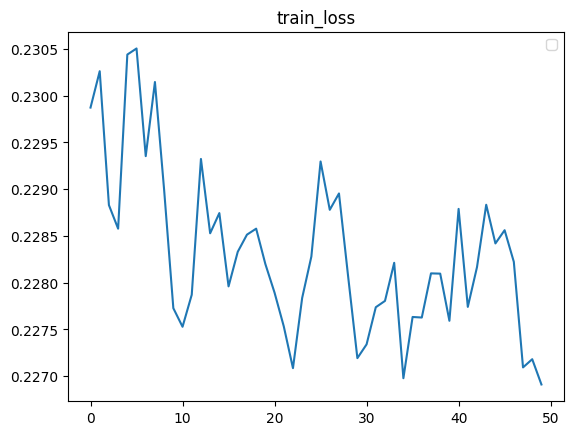

Training Complete!
4 1.0 [[128], [16]]
Epoch [1/1000], Loss: 1.956557, test: 0.207261, lr: 0.001000
Epoch [2/1000], Loss: 1.147995, test: 0.145316, lr: 0.001000
Epoch [3/1000], Loss: 1.114616, test: 0.095184, lr: 0.001000
Epoch [4/1000], Loss: 1.099059, test: 0.084180, lr: 0.001000
Epoch [5/1000], Loss: 1.084743, test: 0.068320, lr: 0.001000
Epoch [6/1000], Loss: 1.066338, test: 0.049288, lr: 0.001000
Epoch [7/1000], Loss: 1.052833, test: 0.036673, lr: 0.001000
Epoch [8/1000], Loss: 1.039618, test: 0.026271, lr: 0.001000
Epoch [9/1000], Loss: 1.032427, test: 0.017941, lr: 0.001000
Epoch [10/1000], Loss: 1.028138, test: 0.014622, lr: 0.001000
Epoch [11/1000], Loss: 1.025658, test: 0.011350, lr: 0.001000
Epoch [12/1000], Loss: 1.021938, test: 0.010354, lr: 0.001000
Epoch [13/1000], Loss: 1.021470, test: 0.010790, lr: 0.001000
Epoch [14/1000], Loss: 1.019220, test: 0.009904, lr: 0.001000
Epoch [15/1000], Loss: 1.020659, test: 0.009442, lr: 0.001000
Epoch [16/1000], Loss: 1.022000, test: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.912254, test: 0.075692, lr: 0.001000


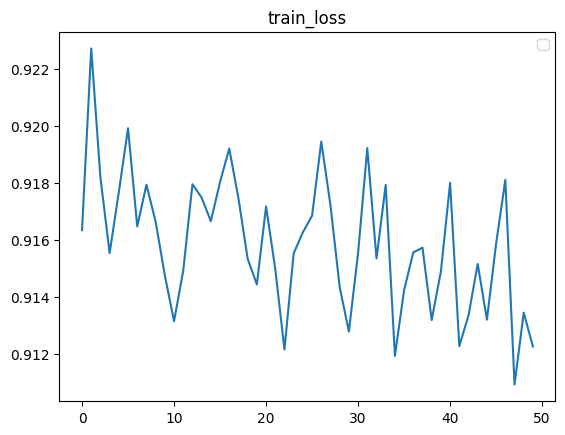

Training Complete!


In [20]:
import time
import dill
n_samples = 20000
widths = [[[16], [64]], [[128],[16]]]
in_dims = [4]
noises = [0,0.2,0.5,1.]
train_losses = []
test_losses = []
for width in widths:
    for in_dim in in_dims:
        for noise in noises:
            print(in_dim, noise, width)
            shape = [in_dim, width[0][0], 1]
            train_loader, test_loader,_ = get_loader(noise,n_samples)
            model = Kan_NN.Neural_Kan(shape = shape, h = width[1])
            epochs = 1000
            model.train()
            optimizer = optim.AdamW(model.parameters(), lr=0.001)
            criterion = torch.nn.MSELoss()
            for epoch in range(epochs):
                running_loss = 0.0 
                for batch, target in train_loader:
                    start_time = time.time()
                    optimizer.zero_grad()
                    outputs = model(batch)
                    loss = criterion(target, outputs)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                avg_loss = running_loss / len(train_loader)
                model.train_loss.append(avg_loss)
                test_l = compute_test_loss(test_loader, model)
                model.test_loss.append(test_l)
                print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
            plt.plot(model.train_loss[-50:])
            plt.title(f'train_loss')
            plt.legend()
            plt.show()
            print("Training Complete!")
            with open(f"models/Friedmann_3_KAN_{width}_{noise}_{in_dim}.dill", "wb") as f:
                dill.dump(model, f)
            #with open(f"models/KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
            #    dill.dump(model, f)

